In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\archive\basket_details.csv")

In [3]:
df

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2
...,...,...,...,...
14995,8336862,50977318,2019-05-26,2
14996,9500785,43862061,2019-05-26,2
14997,22787344,6041664,2019-05-26,2
14998,8221263,3597369,2019-05-26,2


In [4]:
df1 = pd.read_csv(r"D:\archive\customer_details.csv")

In [5]:
df1

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88
...,...,...,...,...
19995,12557307,Male,41.0,52
19996,12595961,Male,29.0,52
19997,12520991,Male,35.0,52
19998,12612719,Male,39.0,52


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB


In [7]:
df.describe()

,customer_id,product_id,basket_count
count,1.500000e+04,1.500000e+04,15000.000000
mean,1.808567e+07,3.269771e+07,2.153733
std,1.233000e+07,1.629455e+07,0.517929
min,4.784000e+03,4.939000e+04,2.000000
25%,8.659327e+06,3.137412e+07,2.000000
50%,1.520775e+07,3.694759e+07,2.000000
75%,2.663904e+07,4.502408e+07,2.000000
max,4.460824e+07,5.579097e+07,10.000000


In [8]:
df.isnull().sum()

customer_id     0
product_id      0
basket_date     0
basket_count    0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   20000 non-null  int64  
 1   sex           20000 non-null  object 
 2   customer_age  20000 non-null  float64
 3   tenure        20000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 625.1+ KB


In [10]:
df1.describe()

,customer_id,customer_age,tenure
count,2.000000e+04,20000.000000,20000.000000
mean,1.760040e+07,262.222550,44.396800
std,8.679505e+06,604.321589,31.998376
min,2.093000e+03,-34.000000,4.000000
25%,1.188115e+07,29.000000,21.000000
50%,1.560912e+07,38.000000,35.000000
75%,2.228484e+07,123.000000,60.000000
max,4.462566e+07,2022.000000,133.000000


In [11]:
df1.isnull().sum()

customer_id     0
sex             0
customer_age    0
tenure          0
dtype: int64

In [17]:
df.head()

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


In [ ]:
df["basket_date"] = pd.to_datetime(df["basket_date"]) 

In [22]:
df3 = pd.merge(df , df1, on = "customer_id", how = "inner")

In [23]:
df3

,customer_id,product_id,basket_date,basket_count,sex,customer_age,tenure
0,4897641,34525548,2019-06-15,2,Male,40.0,114
1,11623549,50394038,2019-06-18,2,Male,30.0,63
2,11665521,41476812,2019-06-15,2,Female,51.0,62
3,4193819,6455162,2019-06-15,2,Male,42.0,117
4,1030589,38578121,2019-05-26,2,Male,45.0,127
...,...,...,...,...,...,...,...
67,15192667,31272089,2019-05-24,2,Male,46.0,37
68,22524187,43154303,2019-05-22,2,Male,27.0,20
69,14248059,48790153,2019-05-21,2,Male,29.0,41
70,10629563,47864502,2019-06-01,2,Male,29.0,76


In [ ]:
df3.groupby("customer_id")["basket_count"].sum().sort_values(ascending=False).head(10) // kim ne ne kadar almış.

customer_id
12737235    5
39814593    5
20236456    5
380975      4
22524187    4
21765975    4
537173      4
27081691    4
34677755    3
43280797    3
Name: basket_count, dtype: int64

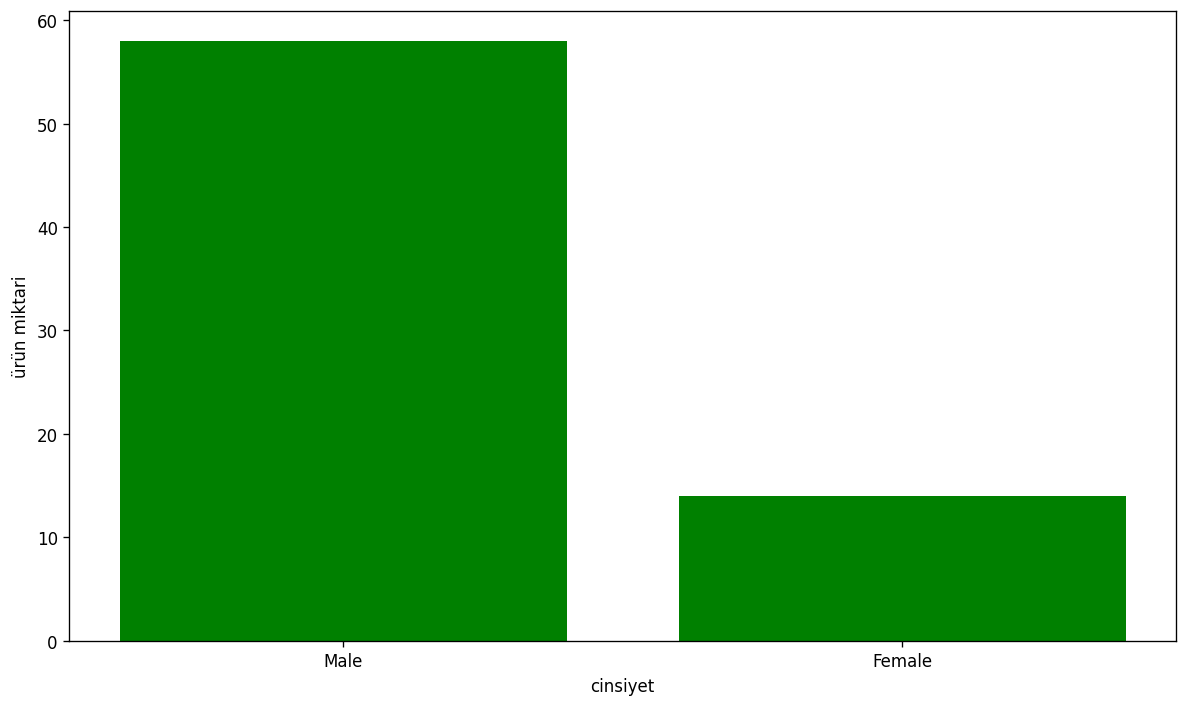

In [29]:
cinsiyet = df3["sex"].value_counts().head(10)
plt.figure(figsize= (10,6), dpi=120)
plt.bar(cinsiyet.index , cinsiyet.values, color = "green")
plt.xlabel("cinsiyet")
plt.ylabel("ürün miktari")
plt.tight_layout()
plt.show()

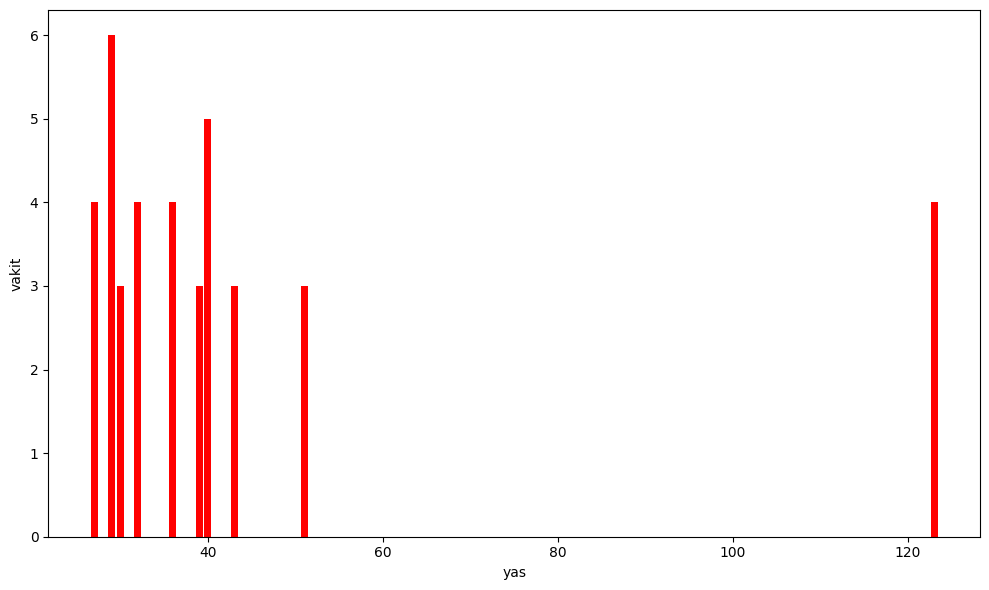

In [33]:
musteri_yas = df3["customer_age"].value_counts().head(10)
plt.figure(figsize=(10,6), dpi=100)
plt. bar(musteri_yas.index, musteri_yas.values, color= "red")
plt.xlabel("yas")
plt.ylabel("vakit")
plt.tight_layout()
plt.show()